# Jose Luis Padilla

## Unidad Repaso, Caso práctico Python

Se han obtenidos dos datasets relacionados con la adquisición y fundación de *startups* a nivel global, el objetivo general, es realizar un análisis exploratorio de datos sobre los elementos comunes de ambos datasets. Estos son los objetivos a realizar:
* Convierte los archivos **funds.csv** y **funding_rounds.csv** a pandas dataframes.
* Busca un elemento común de ambos dataframes y conviértelos en uno solo.
* Elimina las columnas 'id', 'source_url', 'source_description', 'updated_at'.
* Muestra el número de nulos que tiene cada columna del dataframe y qué porcentaje supone dentro de cada columna el número de nulos.
* Modifica todos los valores de 'raised_currency_dode' nulos a 'USD'.
* Elimina el resto de nulos del dataset.
* Muestra el porcentaje de los diferentes valores de 'raised_currency_dode'.
* Crea un sub-conjunto sin el valor USD y visualiza un diagrama de barras.
* Crea un nuevo sub-conjunto filtrando del dataset todas las filas por debajo de 10M y visualiza el histograma.
* Con el conjunto del apartado anterior. Investiga sobre la función contains() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html filtra el dataset por las fechas de creación de las startup en 2000
* Sobre el conjunto filtrado por fecha visualiza la cuantía obtenida explicada por el tipo de moneda.

# SOLUCIÓN

Convierte los archivos **funds.csv** y **funding_rounds.csv** a pandas dataframes

In [1]:
import pandas as pd

In [2]:
# Leemos ambos dataframes
funds = pd.read_csv('C:\\Users\\jlpad\\Desktop\\BBDD\\funds.csv')
f_rounds = pd.read_csv('C:\\Users\\jlpad\\Desktop\\BBDD\\funding_rounds.csv')


In [3]:
f_rounds

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23
3,4,4,c:5,2006-04-01,series-b,b,27500000.0,27500000.0,USD,525000000.0,...,0.0,USD,4,0,0,http://www.facebook.com/press/info.php?factsheet,Facebook Funding,initial-importer,2007-05-27 06:09:36,2013-06-28 20:07:24
4,5,5,c:7299,2006-05-01,series-b,b,10500000.0,10500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.techcrunch.com/2006/05/14/photobuck...,PhotoBucket Closes $10.5M From Trinity Ventures,initial-importer,2007-05-29 11:05:59,2008-04-16 17:09:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52923,57948,57948,c:211890,2013-12-12,series-a,a,3000000.0,3000000.0,USD,0.0,...,0.0,USD,1,1,1,http://techcrunch.com/2013/12/12/bitstrips-ser...,"Bitstrips Confirms $3M Series A From Horizons,...",amit2013,2013-12-12 14:12:05,2013-12-12 14:12:05
52924,57949,57949,c:267427,2010-02-06,venture,partial,570000.0,570000.0,USD,0.0,...,0.0,USD,0,0,1,http://www.sec.gov/Archives/edgar/data/1434188...,SEC,santosh2013,2013-12-12 14:13:11,2013-12-12 14:13:11
52925,57950,57950,c:261728,2010-02-06,venture,unattributed,2184100.0,2184100.0,USD,0.0,...,0.0,USD,0,0,1,http://www.sec.gov/Archives/edgar/data/1335158...,SEC,santosh2013,2013-12-12 14:19:35,2013-12-12 14:19:35
52926,57951,57951,c:285864,2013-12-12,series-a,a,790783.0,790783.0,USD,0.0,...,0.0,USD,0,1,1,http://www.startupticker.ch/en/news/december-2...,UrbanFarmers closes interim-investment round,amit2013,2013-12-12 14:23:49,2013-12-12 14:23:49


In [4]:
# Mostramos las 3 primeras posiciones
funds.head(3)

,id,fund_id,object_id,name,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,1,f:371,Second Fund,2008-12-16,300000000.0,USD,http://www.pehub.com/26194/dfj-dragon-raising-...,peHub,2008-12-17 03:07:16,2008-12-17 03:07:16
1,4,4,f:17,Sequoia Israel Fourth Fund,2008-12-17,200750000.0,USD,http://www.pehub.com/26725/sequoia-israel-rais...,Sequoia Israel Raises Fourth Fund,2008-12-18 22:04:42,2008-12-18 22:04:42
2,5,5,f:951,Tenth fund,2008-08-11,650000000.0,USD,http://venturebeat.com/2008/08/11/interwest-cl...,Venture Beat,2008-12-31 09:47:51,2008-12-31 09:47:51


In [5]:
f_rounds.head(3)

,id,funding_round_id,object_id,funded_at,funding_round_type,funding_round_code,raised_amount_usd,raised_amount,raised_currency_code,pre_money_valuation_usd,...,post_money_valuation,post_money_currency_code,participants,is_first_round,is_last_round,source_url,source_description,created_by,created_at,updated_at
0,1,1,c:4,2006-12-01,series-b,b,8500000.0,8500000.0,USD,0.0,...,0.0,NaN,2,0,0,http://www.marketingvox.com/archives/2006/12/2...,NaN,initial-importer,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,2,c:5,2004-09-01,angel,angel,500000.0,500000.0,USD,0.0,...,0.0,USD,2,0,1,NaN,NaN,initial-importer,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,3,c:5,2005-05-01,series-a,a,12700000.0,12700000.0,USD,115000000.0,...,0.0,USD,3,0,0,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,initial-importer,2007-05-27 06:09:10,2013-06-28 20:07:23


In [6]:
funds.columns

Index(['id', 'fund_id', 'object_id', 'name', 'funded_at', 'raised_amount',
       'raised_currency_code', 'source_url', 'source_description',
       'created_at', 'updated_at'],
      dtype='object')

In [7]:
funds.shape

(1564, 11)

In [8]:
f_rounds.columns

Index(['id', 'funding_round_id', 'object_id', 'funded_at',
       'funding_round_type', 'funding_round_code', 'raised_amount_usd',
       'raised_amount', 'raised_currency_code', 'pre_money_valuation_usd',
       'pre_money_valuation', 'pre_money_currency_code',
       'post_money_valuation_usd', 'post_money_valuation',
       'post_money_currency_code', 'participants', 'is_first_round',
       'is_last_round', 'source_url', 'source_description', 'created_by',
       'created_at', 'updated_at'],
      dtype='object')

In [9]:
f_rounds.shape

(52928, 23)

Busca un elemento común de ambos dataframes y conviértelos en uno solo.

In [10]:
df = pd.concat([f_rounds, funds], ignore_index=True, join='inner')

In [11]:
df.head(3)

,id,object_id,funded_at,raised_amount,raised_currency_code,source_url,source_description,created_at,updated_at
0,1,c:4,2006-12-01,8500000.0,USD,http://www.marketingvox.com/archives/2006/12/2...,NaN,2007-07-04 04:52:57,2008-02-27 23:14:29
1,2,c:5,2004-09-01,500000.0,USD,NaN,NaN,2007-05-27 06:08:18,2013-06-28 20:07:23
2,3,c:5,2005-05-01,12700000.0,USD,http://www.techcrunch.com/2007/11/02/jim-breye...,Jim Breyer: Extra $500 Million Round For Faceb...,2007-05-27 06:09:10,2013-06-28 20:07:23


In [12]:
df.shape

(54492, 9)

Elimina las columnas 'id', 'source_url', 'source_description', 'updated_at'.

In [13]:
items_to_drop = ['id', 'source_url', 'source_description', 'updated_at']

In [14]:
df = df.drop(items_to_drop, axis=1)

Muestra el número de nulos que tiene cada columna del dataframe y qué porcentaje supone dentro de cada columna el número de nulos.

In [15]:
def show_nulls(df):
    # Nulos totales
    total_nan = df.isnull().sum()
    # Porcentaje nulos
    perc_nan = total_nan/len(df)*100
    
    return total_nan, perc_nan

In [16]:
print('Total nulos ', show_nulls(df=df)[0])

Total nulos  object_id                  0
funded_at                363
raised_amount              0
raised_currency_code    3066
created_at                 0
dtype: int64


In [17]:
print('Porcentaje de nulos ', show_nulls(df=df)[1])

Porcentaje de nulos  object_id               0.000000
funded_at               0.666153
raised_amount           0.000000
raised_currency_code    5.626514
created_at              0.000000
dtype: float64


Modifica todos los valores de 'raised_currency_dode' nulos a 'USD'.

In [18]:
df['raised_currency_code'] = df['raised_currency_code'].fillna('USD')

Elimina el resto de nulos del dataset.

In [19]:
df = df.dropna()

Muestra el porcentaje de los diferentes valores de 'raised_currency_dode'

In [20]:
# Primero atendemos a los valores únicos del tipo de moneda.
df['raised_currency_code'].unique()

array(['USD', 'EUR', 'CAD', 'GBP', 'JPY', 'SEK', 'NIS', 'AUD'],
      dtype=object)

In [21]:
print((pd.crosstab(index=df["raised_currency_code"], columns="count"))/len(df) * 100)

col_0                     count
raised_currency_code           
AUD                    0.044339
CAD                    0.533910
EUR                    4.722053
GBP                    2.532838
JPY                    0.131168
NIS                    0.005542
SEK                    0.149643
USD                   91.880508


Crea un sub-conjunto sin el valor USD y visualiza un diagrama de barras.

In [22]:
no_usd = df[df['raised_currency_code'] != 'USD'].copy()

In [23]:
from plotnine import *

C:\Users\jlpad\.conda\envs\tf-gpu\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


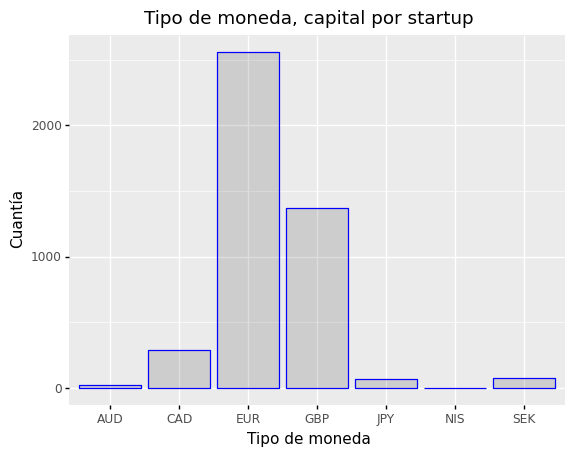

<ggplot: (145206910567)>

In [24]:
(ggplot(no_usd)         
 + aes(x='raised_currency_code')   
 + geom_bar(color="blue", alpha = 0.2) 
 + labs(title='Tipo de moneda, capital por startup', 
         x = 'Tipo de moneda',
         y = 'Cuantía')
)

Crea un nuevo sub-conjunto filtrando del dataset todas las filas por debajo de 10M y visualiza el histograma.

In [25]:
less_tenm = df[df['raised_amount'] <= 10000000].copy()

In [26]:
less_tenm.describe()

,raised_amount
count,4.408700e+04
mean,2.193930e+06
std,2.717348e+06
min,0.000000e+00
25%,1.320000e+05
50%,1.000000e+06
75%,3.325248e+06
max,1.000000e+07


C:\Users\jlpad\.conda\envs\tf-gpu\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 56'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


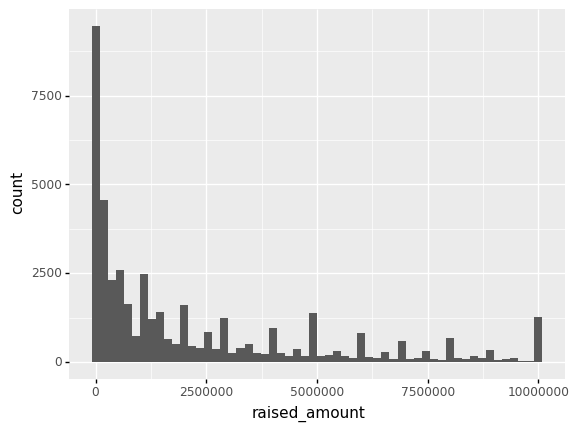

<ggplot: (145206910486)>

In [27]:
(ggplot(less_tenm) +
 geom_histogram(mapping = aes('raised_amount'))
)

C:\Users\jlpad\.conda\envs\tf-gpu\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='raised_amount', ylabel='Density'>

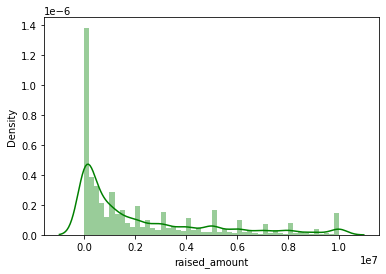

In [28]:
import seaborn as sns
sns.distplot(a=less_tenm['raised_amount'], color='green')

Con el conjunto del apartado anterior. Investiga sobre la función contains() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html filtra el dataset por las fechas de creación de las startup en 2000

In [29]:
less_tenm = less_tenm[less_tenm['funded_at'].str.contains('2000')].copy()

In [30]:
less_tenm

,object_id,funded_at,raised_amount,raised_currency_code,created_at
168,c:253,2000-05-01,7700000.0,USD,2007-07-24 10:56:39
197,c:163,2000-03-01,1200000.0,USD,2007-07-20 10:09:04
213,c:126,2000-10-01,6800000.0,USD,2007-07-24 07:57:20
390,c:537,2000-06-01,3000000.0,USD,2007-08-22 09:46:45
418,c:508,2000-03-01,1100000.0,USD,2007-08-23 06:08:37
...,...,...,...,...,...
49567,c:39473,2000-01-01,600000.0,USD,2013-11-12 14:57:47
52967,f:892,2000-01-01,0.0,USD,2009-02-18 17:56:00
53317,f:1980,2000-10-23,0.0,USD,2011-03-26 22:43:28
53461,f:30,2000-01-01,51.0,EUR,2011-10-28 11:45:45


Sobre el conjunto filtrado por fecha visualiza la cuantía obtenida explicada por el tipo de moneda.

C:\Users\jlpad\.conda\envs\tf-gpu\lib\site-packages\plotnine\utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
C:\Users\jlpad\.conda\envs\tf-gpu\lib\site-packages\plotnine\stats\stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 6'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


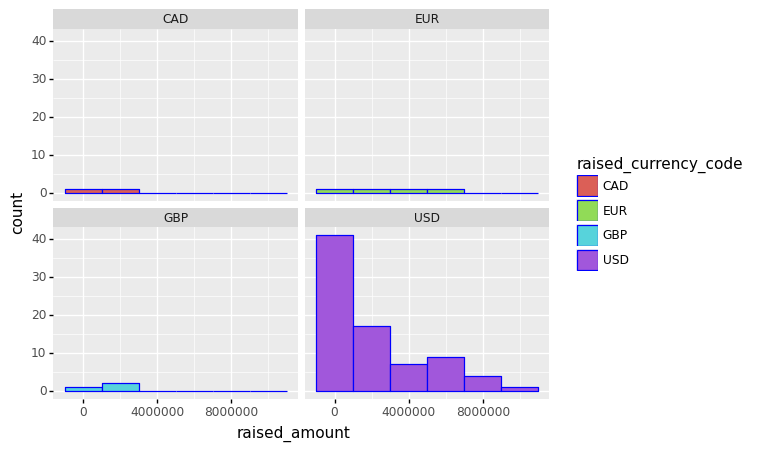

<ggplot: (145208761878)>

In [31]:
(
    ggplot(less_tenm) +
    geom_histogram(mapping=aes('raised_amount', fill = 'raised_currency_code'), color = "blue") +
    facet_wrap('~raised_currency_code')
)